In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from sklearn.model_selection import RepeatedKFold

In [114]:
% run model

array([[0.],
       [1.],
       [2.]])

In [8]:
df2 = pd.read_csv('datasets/taosii_circle_simulation_features.csv')
df2 = df2.iloc[: , 1:]
#df2['tipo'] = 1
del df2['D']
del df2['z']
del df2['R_star']
del df2['tipo']
del df2['toffset']
del df2['T']
from sklearn.preprocessing import KBinsDiscretizer

discretizers = {}
for column in df2.columns:
    X = np.array(df2[column]).reshape(-1,1)
    discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans', subsample=None)
    discretizer.fit(X)
    dump(discretizer, open(f'k_bins_discretizer_{column}.pkl', 'wb'))
    discretizers[column] = discretizer
    df2[column] = discretizer.transform(X).reshape(-1)
    
df2

,diameter,ua,b
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,0.0
...,...,...,...
4095,3.0,3.0,3.0
4096,3.0,3.0,3.0
4097,3.0,3.0,3.0
4098,3.0,3.0,3.0


In [6]:
df2['b']

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
4095    3.0
4096    3.0
4097    3.0
4098    3.0
4099    3.0
Name: b, Length: 4100, dtype: float64

In [14]:
column = 'diameter'
X = np.array(df2[column]).reshape(-1,1)
discretizers[column].inverse_transform(X).reshape(-1)

array([2065.78947368, 2065.78947368, 2065.78947368, ..., 8934.21052632,
       8934.21052632, 8934.21052632])

In [16]:
% run model_toolkit.py


In [140]:
import numpy as np

def calculate_confusion_matrix(y_predicted, y_true):
    vector = [1, 1/4, 1/4*1/5]
    coordinates = []
    for i in range(0, len(y_predicted)):
        coordinates.append((np.dot(y_predicted[i], vector),np.dot(y_true[i], vector)))
    return np.array(coordinates)

confusion_matrix = calculate_confusion_matrix([[1,0,0],[1.1,0,0]],[[1,1,0],[1.1,1,0]])
confusion_matrix

array([[1.  , 1.25],
       [1.1 , 1.35]])

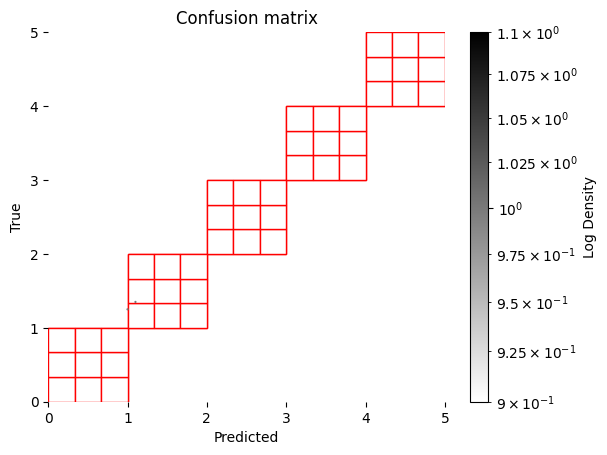

In [142]:
plot_confusion_matrix(confusion_matrix);

In [3]:
%run model_toolkit.py
d = Discretizer()
d.dump()
d.load('../checkpoints/k_bins_discretizer_impact_parameter.pkl')

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform', subsample=None)

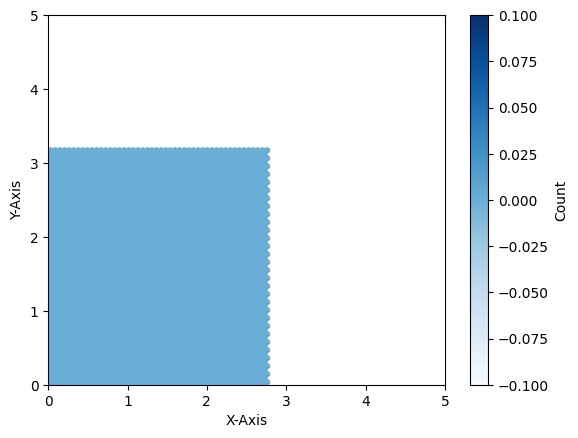

In [147]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.xlim([0, 5])
plt.ylim([0, 5])

# Create a 2D histogram using hist2d
plt.hexbin(x, y, bins=(5, 5), cmap='Blues')

# Add colorbar and labels
plt.colorbar(label='Count')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

# Show the plot
plt.show()


In [150]:
from keras.models import Sequential
from keras.layers import Conv1D
import
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(None, 1)))
model.compile()
model.fit(tf.convert_to_tensor([[1,2,3]]))

NameError: name 'tf' is not defined

In [186]:
import tensorflow as tf
from keras.layers import Input, Dense, Conv1D, Flatten, MaxPooling1D

# Example input shape
input_shape = (4, 1, 92)
x = tf.random.normal(input_shape)

# Create Conv1D layer
input_layer = Input(shape=(10,128))
conv1d_layer = Conv1D(32, 3, activation='relu')(input_layer)


conv1d_layer.shape

TensorShape([None, 8, 32])

In [187]:
x[0]

<tf.Tensor: shape=(1, 92), dtype=float32, numpy=
array([[ 7.2956836e-01,  1.2352724e+00,  5.5473143e-01, -1.0508916e+00,
        -8.0508244e-01,  6.7726195e-01, -9.5129031e-01, -2.0176611e+00,
        -1.8421222e-03, -5.5006331e-01, -6.8333405e-01,  6.2647039e-01,
        -9.4152397e-01, -2.3674710e-02,  3.8217106e-01, -5.8919650e-01,
        -9.1069520e-01, -1.3337243e+00, -5.6856066e-02,  1.7247393e+00,
        -2.5414360e-01,  1.8819801e+00, -2.7488422e-01,  2.9030904e-01,
        -1.0802917e+00, -5.0818020e-01, -1.7371241e+00,  5.1635903e-01,
        -7.0148319e-01,  1.5533860e+00, -6.7430907e-01, -2.4229750e-01,
         1.4974872e+00,  6.5577286e-01,  3.5140029e-01, -1.5371439e+00,
         6.4939445e-01,  1.4727006e+00, -1.2757598e-01,  1.0980339e-01,
         1.9907789e+00,  7.1688718e-01, -6.3519344e-02,  5.0314748e-01,
         1.0318488e+00,  7.3352164e-01, -7.4634537e-02, -1.0317973e+00,
         2.8333992e-01,  8.2364458e-01,  1.4628698e+00,  4.2907512e-01,
        -9.8918

In [172]:
from tensorflow.keras.models import Model

model = Model(inputs=input_layer, outputs=conv1d_layer)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 10, 128)]         0         
                                                                 
 conv1d_11 (Conv1D)          (None, 8, 32)             12320     
                                                                 
Total params: 12320 (48.12 KB)
Trainable params: 12320 (48.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [161]:
# this is a logistic regression in Keras
x = Input(shape=(32,5))
y = Dense(16, activation='softmax')(x)
model = Model(x, y)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 5)]           0         
                                                                 
 dense_3 (Dense)             (None, 32, 16)            96        
                                                                 
Total params: 96 (384.00 Byte)
Trainable params: 96 (384.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [162]:
%run model_toolkit.py
discretizer = Discretizer()
df = load_dataset('datasets/*.npy')
df

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000001,1.000005,1.000006,1.000003,0.999998,1.000001,0.999999,1.000001,1.0,1.0
4096,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000001,1.000005,1.000006,1.000003,0.999998,1.000001,0.999999,1.000001,1.0,1.0
4097,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000001,1.000005,1.000006,1.000003,0.999998,1.000001,0.999999,1.000001,1.0,1.0
4098,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000001,1.000005,1.000006,1.000003,0.999998,1.000001,0.999999,1.000001,1.0,1.0


In [183]:
data_array = df.to_numpy()

In [185]:
data_reshaped = np.reshape(data_array, (data_array.shape[0], data_array.shape[1], 1))
data_reshaped.shape

(4100, 92, 1)